# Section 1 

# Import Libraries

In [4]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#from sklearn.model_selection import GridSearchCV
RSEED = 1234
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import cross_validate
from sklearn import metrics

from sklearn import preprocessing


plt.style.use('ggplot')
####
from sklearn import tree
from sklearn.decomposition import PCA
from sklearn import preprocessing

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
#from xgboost import XGBClassifier, plot_importance 

# Import DataSets 

This dataset contains information about 891 people who were on board the ship when departed on April 15th, 1912. As noted in the description on Kaggle's website, some people aboard the ship were more likely to survive the wreck than others. There were not enough lifeboats for everybody so women, children, and the upper-class were prioritized. Using the information about these **891** passengers, **the challenge is to build a model to predict which people would survive** based on the following fields:

- **Name** (str) - Name of the passenger
- **Pclass** (int) - Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- **Sex** (str) - Sex of the passenger
- **Age** (float) - Age in years
- **SibSp** (int) - Number of siblings and spouses aboard
- **Parch** (int) - Number of parents and children aboard
- **Ticket** (str) - Ticket number 
- **Fare** (float) - Passenger fare
- **Cabin** (str) - Cabin number
- **Embarked** (str) - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)


In [5]:
TrainSet = pd.read_csv(r"C:\Users\Admin\Desktop\ML3\train.csv")
TestSet = pd.read_csv(r"C:\Users\Admin\Desktop\ML3\test.csv")
TrainSet.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Section 2 + 3

# Drop all categorical features
- **PassengerId** (Num) - Passenger serial_Number
- **Name** (str) - Name of the passenger
- **Ticket** (str) - Ticket number 

**Droping** all this Marginal information about the passengers


In [6]:
train_Drop_features = ['PassengerId', 'Name', 'Ticket']
test_Drop_features = ['Name', 'Ticket']
train = TrainSet.drop(train_Drop_features, axis=1, inplace=False)
test = TestSet.drop(test_Drop_features, axis=1, inplace=False)


# Convert sex type to numerical type in train/test sets

In [7]:
gender_num = {'male': 1, 'female': 0}

train['Sex'] = train['Sex'].map(gender_num)
test['Sex'] = test['Sex'].map(gender_num)

# Convert Embarked type to numerical type in train/test sets


In [8]:
Embarked_num = {'C': 1, 'Q': 2, 'S': 3}

train['Embarked'] = train['Embarked'].map(Embarked_num)
test['Embarked'] = test['Embarked'].map(Embarked_num)

# Show trainData statistics

In [9]:
train.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,889.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,2.535433
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.792088
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,2.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,3.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,3.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


# Check Null values

In [10]:
for i in [train, test]:
    print("-----------------")
    print(i.isnull().sum())

-----------------
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64
-----------------
PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Fare             1
Cabin          327
Embarked         0
dtype: int64


# Drop Cabin feature 

In [11]:
train = train.drop(['Cabin'], axis=1, inplace=False)
test = test.drop(['Cabin'], axis=1, inplace=False)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,3.0
1,1,1,0,38.0,1,0,71.2833,1.0
2,1,3,0,26.0,0,0,7.9250,3.0
3,1,1,0,35.0,1,0,53.1000,3.0
4,0,3,1,35.0,0,0,8.0500,3.0


# Fill Embarked/Fare Null values

In [12]:
train['Embarked'].fillna(train['Embarked'].max(), inplace=True)
test['Fare'].fillna(test['Fare'].mean(), inplace=True)


# Combine Colomns
Family_Size = combine of **Sibsp** (Number of siblings and spouses aboard) and 
                         **Parch** (Number of parents and children aboard and Parch)

In [13]:
train['FamilySize']=train['SibSp']+train['Parch']
test['FamilySize']=test['SibSp']+test['Parch']
train.drop(['SibSp', 'Parch'], axis=1, inplace=True)
test.drop(['SibSp', 'Parch'], axis=1, inplace=True)
test.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,892,3,1,34.5,7.8292,2,0
1,893,3,0,47.0,7.0000,3,1
2,894,2,1,62.0,9.6875,2,0
3,895,3,1,27.0,8.6625,3,0
4,896,3,0,22.0,12.2875,3,2
5,897,3,1,14.0,9.2250,3,0
6,898,3,0,30.0,7.6292,2,0
7,899,2,1,26.0,29.0000,3,2
8,900,3,0,18.0,7.2292,1,0
9,901,3,1,21.0,24.1500,3,2


# num of Survived/ not Survived from all the passengers

In [14]:
survived = train[train['Survived'] == 1]
not_survived = train[train['Survived'] == 0]

print ("Survived: %i (%.1f%%)"%(len(survived), float(len(survived))/len(train)*100.0))
print ("Not Survived: %i (%.1f%%)"%(len(not_survived), float(len(not_survived))/len(train)*100.0))
print ("Total: %i"%len(train))

Survived: 342 (38.4%)
Not Survived: 549 (61.6%)
Total: 891


# Num of Male/ Female from who survived

In [15]:
Male = train[train['Sex'] == 1]
Female = train[train['Sex'] == 0]

Survived_Male = Male[Male['Survived'] == 1]
Survived_Female = Female[Female['Survived'] == 1]

print ("Male: %i  - (%.1f%%)"%(len(Male), float(len(Male))/len(train)*100.0))
print ("Female: %i - (%.1f%%)"%(len(Female), float(len(Female))/len(train)*100.0))
print("------------------")
print ("Survived_Male: %i  - (%.1f%%)"%(len(Survived_Male), float(len(Survived_Male))/len(Male)*100.0))
print ("Survived_Female: %i  - (%.1f%%)"%(len(Survived_Female), float(len(Survived_Female))/len(Female)*100.0))
print("------------------")
print ("Total Survived: %i"%(len(Survived_Male) + len(Survived_Female)))

Male: 577  - (64.8%)
Female: 314 - (35.2%)
------------------
Survived_Male: 109  - (18.9%)
Survived_Female: 233  - (74.2%)
------------------
Total Survived: 342


# Num of different PclassTypes from who survived

In [16]:
Pclass1 = train[train['Pclass'] == 1]
Pclass2 = train[train['Pclass'] == 2]
Pclass3 = train[train['Pclass'] == 3]

Survived_Pclass1 = Pclass1[Pclass1['Survived'] == 1]
Survived_Pclass2 = Pclass2[Pclass2['Survived'] == 1]
Survived_Pclass3 = Pclass3[Pclass3['Survived'] == 1]

print ("1st_Pclass: %i  - (%.1f%%)"%(len(Pclass1), float(len(Pclass1))/len(train)*100.0))
print ("2nd_Pclass: %i  - (%.1f%%)"%(len(Pclass2), float(len(Pclass2))/len(train)*100.0))
print ("3rd_Pclass: %i  - (%.1f%%)"%(len(Pclass3), float(len(Pclass3))/len(train)*100.0))
print("------------------")
print ("1st_Pclass_Survived: %i  - (%.1f%%)"%(len(Survived_Pclass1), float(len(Survived_Pclass1))/len(Pclass1)*100.0))
print ("2nd_Pclass_Survived: %i  - (%.1f%%)"%(len(Survived_Pclass2), float(len(Survived_Pclass2))/len(Pclass2)*100.0))
print ("3rd_Pclass_Survived: %i  - (%.1f%%)"%(len(Survived_Pclass3), float(len(Survived_Pclass3))/len(Pclass3)*100.0))
print("------------------")
print ("Total Survived: %i"%(len(Survived_Pclass1) + len(Survived_Pclass2) + len(Survived_Pclass3)))

1st_Pclass: 216  - (24.2%)
2nd_Pclass: 184  - (20.7%)
3rd_Pclass: 491  - (55.1%)
------------------
1st_Pclass_Survived: 136  - (63.0%)
2nd_Pclass_Survived: 87  - (47.3%)
3rd_Pclass_Survived: 119  - (24.2%)
------------------
Total Survived: 342


# Num of passegers Their age is bigger/ smaller than average from who survived

In [17]:
average = train['Age'].mean()
AgeLessThanMean = train[train['Age'] <= average]
AgeMoreThanMean = train[train['Age'] > average]

Survived_BiggerThanAgeMean = AgeMoreThanMean[AgeMoreThanMean['Survived'] == 1]
Survived_SmallerThanAgeMean = AgeLessThanMean[AgeLessThanMean['Survived'] == 1]

print ("AgeLessThanMean: %i  - (%.1f%%)"%(len(AgeLessThanMean), float(len(AgeLessThanMean))/len(train)*100.0))
print ("AgeMoreThanMean: %i - (%.1f%%)"%(len(AgeMoreThanMean), float(len(AgeMoreThanMean))/len(train)*100.0))
print("------------------")
print ("Survived_BiggerThanAgeMean: %i  - (%.1f%%)"%(len(Survived_BiggerThanAgeMean), float(len(Survived_BiggerThanAgeMean))/len(AgeMoreThanMean)*100.0))
print ("Survived_BiggerThanAgeMean: %i  - (%.1f%%)"%(len(Survived_SmallerThanAgeMean), float(len(Survived_SmallerThanAgeMean))/len(AgeLessThanMean)*100.0))
print("------------------")
print ("Total Survived: %i"%(len(Survived_BiggerThanAgeMean) + len(Survived_SmallerThanAgeMean)))

AgeLessThanMean: 384  - (43.1%)
AgeMoreThanMean: 330 - (37.0%)
------------------
Survived_BiggerThanAgeMean: 134  - (40.6%)
Survived_BiggerThanAgeMean: 156  - (40.6%)
------------------
Total Survived: 290


# Number of FamilySize for passengers who survived

In [18]:

FamilySize_0to3 = train[train['FamilySize'] >= 1] 
FamilySize_0to3 =  FamilySize_0to3[FamilySize_0to3['FamilySize'] <= 3]
FamilySize_4to6 = train[train['FamilySize'] >= 4] 
FamilySize_4to6 =  FamilySize_4to6[FamilySize_4to6['FamilySize'] <= 6]
FamilySize_7to10 = train[train['FamilySize'] >= 7] 

Survived_FamilySize_0to3 = FamilySize_0to3[FamilySize_0to3['Survived'] == 1]
Survived_FamilySize_4to6 = FamilySize_4to6[FamilySize_4to6['Survived'] == 1]
Survived_FamilySize_7to10 = FamilySize_7to10[FamilySize_7to10['Survived'] == 1]

print ("FamilySize_0to3: %i  - (%.1f%%)"%(len(FamilySize_0to3), float(len(FamilySize_0to3))/len(train)*100.0))
print ("FamilySize_4to6: %i - (%.1f%%)"%(len(FamilySize_4to6), float(len(FamilySize_4to6))/len(train)*100.0))
print ("FamilySize_7to10: %i - (%.1f%%)"%(len(FamilySize_7to10), float(len(FamilySize_7to10))/len(train)*100.0))
print("------------------")
print ("Survived_BiggerThanAgeMean: %i  - (%.1f%%)"%(len(Survived_FamilySize_0to3), float(len(Survived_FamilySize_0to3))/len(FamilySize_0to3)*100.0))
print ("Survived_BiggerThanAgeMean: %i  - (%.1f%%)"%(len(Survived_FamilySize_4to6), float(len(Survived_FamilySize_4to6))/len(FamilySize_4to6)*100.0))
print ("Survived_BiggerThanAgeMean: %i  - (%.1f%%)"%(len(Survived_FamilySize_7to10), float(len(Survived_FamilySize_7to10))/len(FamilySize_7to10)*100.0))
print("------------------")
print ("Total Survived: %i"%(len(Survived_BiggerThanAgeMean) + len(Survived_SmallerThanAgeMean)))

FamilySize_0to3: 292  - (32.8%)
FamilySize_4to6: 49 - (5.5%)
FamilySize_7to10: 13 - (1.5%)
------------------
Survived_BiggerThanAgeMean: 169  - (57.9%)
Survived_BiggerThanAgeMean: 10  - (20.4%)
Survived_BiggerThanAgeMean: 0  - (0.0%)
------------------
Total Survived: 290


# Number of Passengers who survived based on their Fare

In [19]:
FareAverage = train['Fare'].mean()

FareLessThanMean = train[train['Fare'] < FareAverage]
FareMoreThanMean = train[train['Fare'] >= FareAverage]

Survived_SmallerThanFareMean = FareLessThanMean[FareLessThanMean['Survived'] == 1]
Survived_BiggerThanFareMean = FareMoreThanMean[FareMoreThanMean['Survived'] == 1]

print ("FareLessThanMean: %i  - (%.1f%%)"%(len(FareLessThanMean), float(len(FareLessThanMean))/len(train)*100.0))
print ("FareMoreThanMean: %i - (%.1f%%)"%(len(FareMoreThanMean), float(len(FareMoreThanMean))/len(train)*100.0))
print("------------------")
print ("Survived_SmallerThanFareMean: %i  - (%.1f%%)"%(len(Survived_SmallerThanFareMean), float(len(Survived_SmallerThanFareMean))/len(FareLessThanMean)*100.0))
print ("Survived_BiggerThanFareMean: %i  - (%.1f%%)"%(len(Survived_BiggerThanFareMean), float(len(Survived_BiggerThanFareMean))/len(FareMoreThanMean)*100.0))
print("------------------")
print ("Total Survived: %i"%(len(Survived_BiggerThanFareMean) + len(Survived_SmallerThanFareMean)))

FareLessThanMean: 680  - (76.3%)
FareMoreThanMean: 211 - (23.7%)
------------------
Survived_SmallerThanFareMean: 216  - (31.8%)
Survived_BiggerThanFareMean: 126  - (59.7%)
------------------
Total Survived: 342


# Number of Passengers who survived based on their Embarke

In [20]:
Embarked1 = train[train['Embarked'] == 1]
Embarked2 = train[train['Embarked'] == 2]
Embarked3 = train[train['Embarked'] == 3]

Survived_Embarked1 = Embarked1[Embarked1['Survived'] == 1]
Survived_Embarked2 = Embarked2[Embarked2['Survived'] == 1]
Survived_Embarked3 = Embarked3[Embarked3['Survived'] == 1]

print ("Embarked=1: %i  - (%.1f%%)"%(len(Embarked1), float(len(Embarked1))/len(train)*100.0))
print ("Embarked=2: %i  - (%.1f%%)"%(len(Embarked2), float(len(Embarked2))/len(train)*100.0))
print ("Embarked=3: %i  - (%.1f%%)"%(len(Embarked3), float(len(Embarked3))/len(train)*100.0))
print("------------------")
print ("Survived_Embarked=1: %i  - (%.1f%%)"%(len(Survived_Embarked1), float(len(Survived_Embarked1))/len(Embarked1)*100.0))
print ("Survived_Embarked=2: %i  - (%.1f%%)"%(len(Survived_Embarked2), float(len(Survived_Embarked2))/len(Embarked2)*100.0))
print ("Survived_Embarked=3: %i  - (%.1f%%)"%(len(Survived_Embarked3), float(len(Survived_Embarked3))/len(Embarked3)*100.0))
print("------------------")
print ("Total Survived: %i"%(len(Survived_Embarked1) + len(Survived_Embarked2) + len(Survived_Embarked3)))

Embarked=1: 168  - (18.9%)
Embarked=2: 77  - (8.6%)
Embarked=3: 646  - (72.5%)
------------------
Survived_Embarked=1: 93  - (55.4%)
Survived_Embarked=2: 30  - (39.0%)
Survived_Embarked=3: 219  - (33.9%)
------------------
Total Survived: 342


# Plot describes who survived based on Age & Fare 

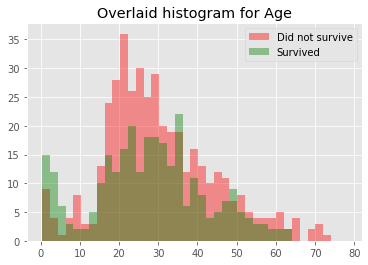

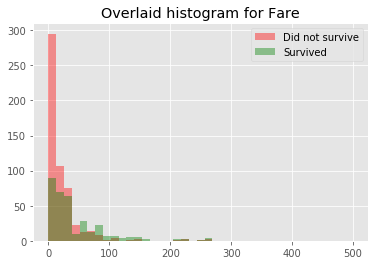

In [21]:
for i in ['Age', 'Fare']:
    died = list(train[train['Survived'] == 0][i].dropna())
    survived = list(train[train['Survived'] == 1][i].dropna())
    xmin = min(min(died), min(survived))
    xmax = max(max(died), max(survived))
    width = (xmax - xmin) / 40
    sns.distplot(died, color='r', kde=False, bins=np.arange(xmin, xmax, width))
    sns.distplot(survived, color='g', kde=False, bins=np.arange(xmin, xmax, width))
    plt.legend(['Did not survive', 'Survived'])
    plt.title('Overlaid histogram for {}'.format(i))
    plt.show()

# Fill Null values
**Age** null values fill with Age.mean() on test/train sets.

**Fare** null values fill with Fare.mean() on test set.

In [22]:
train['Age'].fillna(train['Age'].mean(), inplace=True)
test['Age'].fillna(test['Age'].mean(), inplace=True)
test['Fare'].fillna(test['Fare'].mean(), inplace=True)
for i in [train, test]:
    print("-----------------")
    print(i.isnull().sum())

-----------------
Survived      0
Pclass        0
Sex           0
Age           0
Fare          0
Embarked      0
FamilySize    0
dtype: int64
-----------------
PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
FamilySize     0
dtype: int64


# After fillin null values - the same plot describes who survived based on Age & Fare 

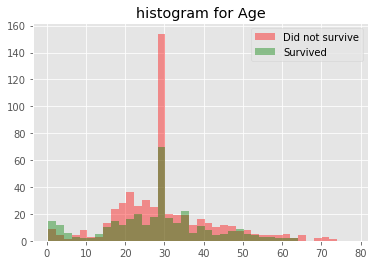

In [23]:
for i in ['Age']:
    died = list(train[train['Survived'] == 0][i].dropna())
    survived = list(train[train['Survived'] == 1][i].dropna())
    xmin = min(min(died), min(survived))
    xmax = max(max(died), max(survived))
    width = (xmax - xmin) / 40
    sns.distplot(died, color='r', kde=False, bins=np.arange(xmin, xmax, width))
    sns.distplot(survived, color='g', kde=False, bins=np.arange(xmin, xmax, width))
    plt.legend(['Did not survive', 'Survived'])
    plt.title('histogram for {}'.format(i))
    plt.show()

# Another plot for age - descibes the frequency 

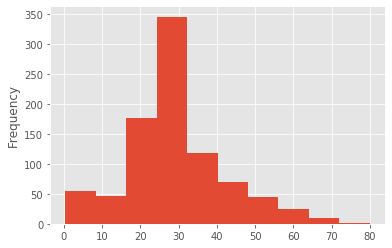

In [24]:
train['Age'].plot.hist()

# Plot descibes a percentage between Pclaa and Sex features 

Sex       0    1
Pclass          
1        94  122
2        76  108
3       144  347


Text(0, 0.5, 'Percentage')

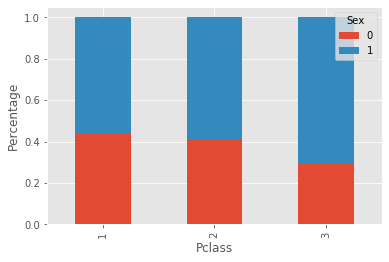

In [25]:
tab = pd.crosstab(train['Pclass'], train['Sex'])
print (tab)

tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Pclass')
plt.ylabel('Percentage')

# Plot descibes a percentage between Pclaa and Sex features 

Sex         0    1
Embarked          
1.0        73   95
2.0        36   41
3.0       205  441


Text(0, 0.5, 'Percentage')

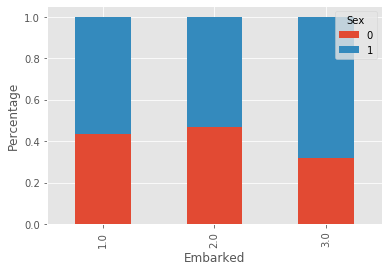

In [26]:
tab = pd.crosstab(train['Embarked'], train['Sex'])
print (tab)

tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Embarked')
plt.ylabel('Percentage')

# Plot descibes a survived_per_class for features:
**Sex**/ **Pclass**/ **FamilySize**/ **Embarked** 

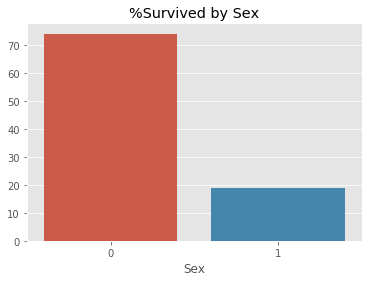

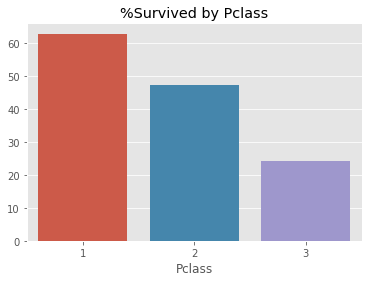

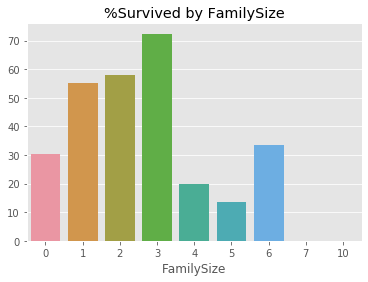

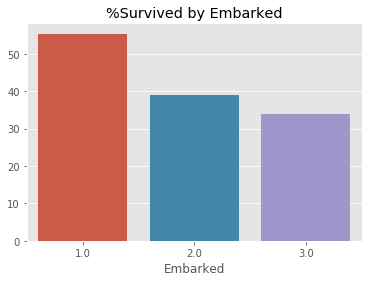

In [27]:
def survived_per_class_relative(df, column):
    data = df.groupby(column)['Survived'].sum()*100/df.groupby(column)['Survived'].count()
    sns.barplot(x = data.index,y = data.values)
    plt.title('%Survived by '+ column)
    plt.show()
    
survived_per_class_relative(train,'Sex')
survived_per_class_relative(train,'Pclass')
survived_per_class_relative(train,'FamilySize')
survived_per_class_relative(train,'Embarked')


# Section 4 - DecisionTreeClassifier
1- calculate accuracy for the train data by spliting it to train and validation sets.

2- predict the labels for the test data and write it to external csv, by training the train data.

In [28]:
features = train.drop('Survived', axis=1)
labels = train['Survived']

X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.3, random_state=RSEED)


In [29]:
clf = DecisionTreeClassifier(random_state=RSEED)
scoring = {'acc': 'accuracy',
           'prec': 'precision_macro',
           'rec': 'recall_macro'}
scores = cross_validate(clf, X_train, y_train, cv=10, scoring=scoring)

print ('Accuracy score : %.3f' % scores['test_acc'].mean())
print ('Precisoin score : %.3f' % scores['test_prec'].mean())
print ('Recall score : %.3f' % scores['test_rec'].mean())


Accuracy score : 0.753
Precisoin score : 0.746
Recall score : 0.741


In [30]:
para_grid = {
    'min_samples_split' : range(10,500,20),
    'max_depth': range(1,20,2),
    'criterion': ("gini", "entropy")
}

clf_cv = GridSearchCV(clf,
                   para_grid,
                   scoring='accuracy',
                   cv=5,
                   n_jobs=-1)
clf_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=1234,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': range(1, 20, 2),
                        

In [31]:
best_parameters = clf_cv.best_params_
best_parameters

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 10}

In [32]:
clf2 = clf_cv.best_estimator_
scoring = {'acc': 'accuracy',
           'prec': 'precision_macro',
           'rec': 'recall_macro'}
scores = cross_validate(clf2, X_val, y_val, cv=10, scoring=scoring)

print ('Accuracy score : %.3f' % scores['test_acc'].mean())
print ('Precisoin score : %.3f' % scores['test_prec'].mean())
print ('Recall score : %.3f' % scores['test_rec'].mean())


Accuracy score : 0.788
Precisoin score : 0.796
Recall score : 0.759


In [33]:
clf2.fit(X_train, y_train)
predictions = clf2.predict(X_val)
print("Accuracy - Val set: ", metrics.accuracy_score(y_val,predictions))


Accuracy - Val set:  0.8208955223880597


# 2 - predict test data using DecisionTree

In [34]:
X_train = train.drop('Survived', axis=1)
y_train = train['Survived']

In [35]:
clf = DecisionTreeClassifier(random_state=RSEED)
para_grid = {
    'min_samples_split' : range(10,500,20),
    'max_depth': range(1,20,2),
    'criterion': ("gini", "entropy")
}

clf_cv = GridSearchCV(clf,
                   para_grid,
                   scoring='accuracy',
                   cv=5,
                   n_jobs=-1)
clf_cv.fit(X_train,y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=1234,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': range(1, 20, 2),
                        

In [36]:
best_parameters = clf_cv.best_params_
best_parameters

{'criterion': 'entropy', 'max_depth': 11, 'min_samples_split': 30}

In [37]:
clf2 = clf_cv.best_estimator_
#set ids as PassengerId and predict survival
ids = test['PassengerId']

clf2.fit(X_train, y_train)
X_test = test.drop("PassengerId", axis = 1)
predictions = clf2.predict(X_test)

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })


In [38]:
output.to_csv(r'C:\Users\Admin\Desktop\ML3\DecisionTreesubmission.csv', index=False)

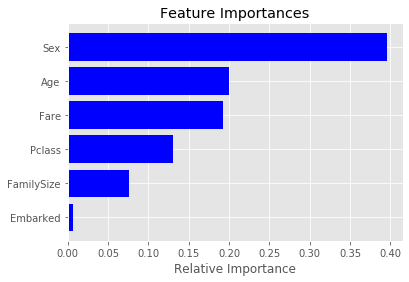

In [39]:
importances = clf2.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Random Forest

In [40]:
features = train.drop('Survived', axis=1)
labels = train['Survived']
X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.33, random_state=RSEED)

In [41]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               random_state=RSEED, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

# Fit on training data
model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1234, verbose=1,
                       warm_start=False)

In [42]:
n_nodes = []
max_depths = []

for ind_tree in model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 233
Average maximum depth 16


In [43]:
model.fit(X_train, y_train)
predictions = model.predict(X_val)
print("Accuracy - Val set: ", metrics.accuracy_score(y_val,predictions))


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


Accuracy - Val set:  0.8033898305084746


# 2 - predict test data using RandomForest

In [44]:
X_train = train.drop('Survived', axis=1)
y_train = train['Survived']

In [45]:
# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               random_state=RSEED, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

# Fit on training data
model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1234, verbose=1,
                       warm_start=False)

In [46]:
n_nodes = []
max_depths = []

for ind_tree in model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 349
Average maximum depth 17


In [47]:
model.fit(X_train, y_train)
X_test = test.drop("PassengerId", axis = 1)
predictions = model.predict(X_test)

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })

output.to_csv(r'C:\Users\Admin\Desktop\ML3\RandomForestSubmission.csv', index=False)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


# AdaboostClassifier

1- calculate accuracy for the train data by spliting it to train and validation sets.

2- predict the labels for the test data and write it to external csv, by training the train data.

In [48]:
X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.3, shuffle=True, random_state=1)

In [49]:
adb = AdaBoostClassifier(random_state=RSEED)
adb_param_grid = {'n_estimators':[50,100,150,200,250], #Number of weak learners to train iteratively., 
                  'learning_rate':[0.001, 0.01, 0.1, 1], #It contributes to the weights of weak learners. It uses 1 as a default value.,
                  'random_state': [1]}

gsADB = GridSearchCV(adb,param_grid = adb_param_grid, cv=5, scoring="accuracy", n_jobs= -1)

gsADB.fit(X_train,y_train)

ADB_best = gsADB.best_estimator_


print("Best Parameters:\n", gsADB.best_params_)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters:
 {'learning_rate': 0.1, 'n_estimators': 150, 'random_state': 1}


In [50]:
adb = AdaBoostClassifier(ADB_best)
adb.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                     base_estimator=None,
                                                     learning_rate=0.1,
                                                     n_estimators=150,
                                                     random_state=1),
                   learning_rate=1.0, n_estimators=50, random_state=None)

In [51]:
adb.feature_importances_

array([0.07133333, 0.1352    , 0.3412    , 0.3064    , 0.02693333,
       0.11893333])

In [52]:
y_pred=adb.predict(X_val)
metrics.accuracy_score(y_val,y_pred)

0.7873134328358209

# 2 - predict test data using adaboost


In [53]:
X_train = train.drop('Survived', axis=1)
y_train = train['Survived']

In [54]:
adb = AdaBoostClassifier(random_state=RSEED)
adb_param_grid = {'n_estimators':[50,100,150,200,250], #Number of weak learners to train iteratively., 
                  'learning_rate':[0.001, 0.01, 0.1, 1], #It contributes to the weights of weak learners. It uses 1 as a default value.,
                  'random_state': [1]}

gsADB = GridSearchCV(adb,param_grid = adb_param_grid, cv=5, scoring="accuracy", n_jobs= -1)

gsADB.fit(X_train,y_train)

ADB_best = gsADB.best_estimator_


print("Best Parameters:\n", gsADB.best_params_)

Best Parameters:
 {'learning_rate': 1, 'n_estimators': 50, 'random_state': 1}


In [55]:
adb = AdaBoostClassifier(ADB_best)
adb.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                     base_estimator=None,
                                                     learning_rate=1,
                                                     n_estimators=50,
                                                     random_state=1),
                   learning_rate=1.0, n_estimators=50, random_state=None)

In [56]:
X_test = test.drop("PassengerId", axis = 1)
predictions=adb.predict(X_test)

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })


In [57]:
output.to_csv(r'C:\Users\Admin\Desktop\ML3\AdaboostSubmission.csv', index=False)

# Section 4 - SVM
1- calculate accuracy for the train data by spliting it to train and validation sets.

2- predict the labels for the test data and write it to external csv, by training the train data.

In [58]:
from sklearn.metrics import confusion_matrix #confusion matrix
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.ensemble import RandomForestClassifier #Random Forest Classifier
from sklearn.svm import SVC #Support Vector Machine
from sklearn.preprocessing import StandardScaler #For scaling data
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.model_selection import train_test_split #Split data into training and validation sets.
from sklearn.metrics import accuracy_score  #Accuracy Score

In [59]:
#Split data into training and validation set
X = train.drop('Survived', axis=1)
y = train['Survived']

#Note they are labeled as test sets but I'm treating them as validation data sets.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30)

In [60]:
from sklearn.svm import SVC
svm = SVC(random_state=RSEED)

param_grid = {'C':[0.1,1,10,100], 'gamma':[1,0.1,0.01,0.001]}
grid = GridSearchCV(svm, param_grid, refit = True, verbose=3)
grid.fit(X_train, y_train)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.606, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.606, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.604, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.606, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.606, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.604, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.639, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.633, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.635, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.683, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.633, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.639, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.659, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    1.3s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=1234, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [61]:
pred_grid = grid.predict(X_val)

In [62]:
metrics.accuracy_score(y_val,pred_grid)

0.75

# Predict the test labels 

In [63]:
#Split data into training and validation set
X_train = train.drop('Survived', axis=1)
y_train = train['Survived']


In [64]:
from sklearn.svm import SVC
svm = SVC()

param_grid = {'C':[0.1,1,10,100], 'gamma':[1,0.1,0.01,0.001]}
grid = GridSearchCV(svm, param_grid, refit = True, verbose=3)
grid.fit(X_train, y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.616, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.616, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.616, total=   0.1s

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.616, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.616, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.616, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.653, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.636, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.633, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.603, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    2.9s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [65]:

X_test = test.drop("PassengerId", axis = 1)
predictions = grid.predict(X_test)
#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })


output.to_csv(r'C:\Users\Admin\Desktop\ML3\SVM_Submission.csv', index=False)

# Section 4 - KNN


In [66]:
#Split data into training and validation set
X = train.drop('Survived', axis=1)
y = train['Survived']

#Note they are labeled as test sets but I'm treating them as validation data sets.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30)

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
params = {'n_neighbors':[6,8,10,12,14,16,18,20],
         'leaf_size':list(range(1,50,5))}

# Using ROC_AUC as metric has a better result than using accuracy. 
grid = GridSearchCV(KNN, param_grid= params, cv = 5,scoring = "roc_auc",verbose=1)
grid.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    5.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'leaf_size': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46],
                         'n_neighbors': [6, 8, 10, 12, 14, 16, 18, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=1)

In [68]:
print("Best_score: ", grid.best_score_)

Best_score:  0.7522996011714026


In [69]:
print("Best_estimator: ", grid.best_estimator_)

Best_estimator:  KNeighborsClassifier(algorithm='auto', leaf_size=11, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')


In [70]:
print ("Best Parameters: ",str(grid.best_params_))

Best Parameters:  {'leaf_size': 11, 'n_neighbors': 20}


In [71]:

X_test = test.drop("PassengerId", axis = 1)
predictions = grid.predict(X_val)
metrics.accuracy_score(y_val,predictions)

0.664179104477612

# Predict the test values

In [72]:
X_train = train.drop('Survived', axis=1)
y_train = train['Survived']


In [73]:
KNN = KNeighborsClassifier()
params = {'n_neighbors':[6,8,10,12,14,16,18,20],
         'leaf_size':list(range(1,50,5))}

# Using ROC_AUC as metric has a better result than using accuracy. 
grid = GridSearchCV(KNN, param_grid= params, cv = 5,scoring = "roc_auc",verbose=1)
grid.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    5.0s finished
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'leaf_size': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46],
                         'n_neighbors': [6, 8, 10, 12, 14, 16, 18, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=1)

In [74]:
print("Best_score: ", grid.best_score_)

Best_score:  0.7486995181005903


In [75]:
print ("Best Parameters: ",str(grid.best_params_))

Best Parameters:  {'leaf_size': 6, 'n_neighbors': 10}


In [76]:
X_test = test.drop("PassengerId", axis = 1)
predictions = grid.predict(X_test)

#set the output as a dataframe and convert to csv file named KNN_submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })


output.to_csv(r'C:\Users\Admin\Desktop\ML3\KNN_Submission.csv', index=False)

# PCA

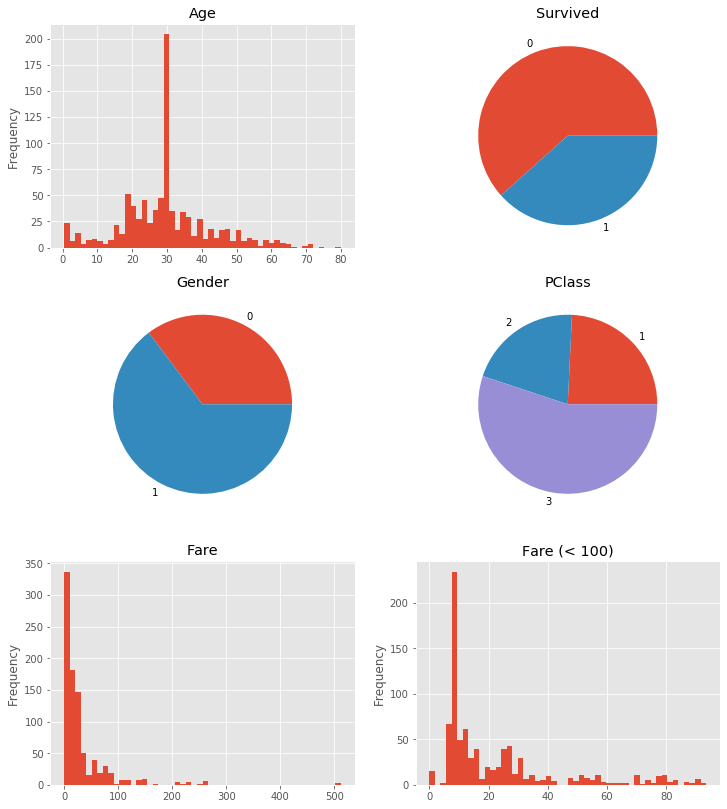

In [77]:
fig, axs = plt.subplots(3, 2, squeeze=False, figsize=(12, 14))
train.Age.plot.hist(bins=50, title='Age', ax=axs[0, 0])
train.groupby('Survived').agg('count')['Age'].plot.pie(title='Survived', ax=axs[0, 1])
axs[0, 1].set_ylabel('')
train.groupby('Sex').agg('count')['Age'].plot.pie(title='Gender', ax=axs[1, 0])
axs[1, 0].set_ylabel('')
train.groupby('Pclass').agg('count')['Age'].plot.pie(title='PClass', ax=axs[1, 1])
axs[1, 1].set_ylabel('')
fare = train.Fare
fare.plot.hist(bins=50, title='Fare', ax=axs[2, 0])
fare[fare < 100].plot.hist(bins=50, title='Fare (< 100)', ax=axs[2, 1])

In [78]:
train_survive = train[train.Survived == 1]
train_dead = train[train.Survived == 0]


In [79]:

def plot_kde(fig, ncols, nrows, mypos, title, feature, xmin=0, xmax=None):
    ax = fig.add_subplot(ncols, nrows, mypos)
    train_survive[feature].plot.kde(ax=ax, color='g')
    train_dead[feature].plot.kde(ax=ax, color='r')
    ax.set_title(title)
    ax.set_xlim(xmin, xmax)


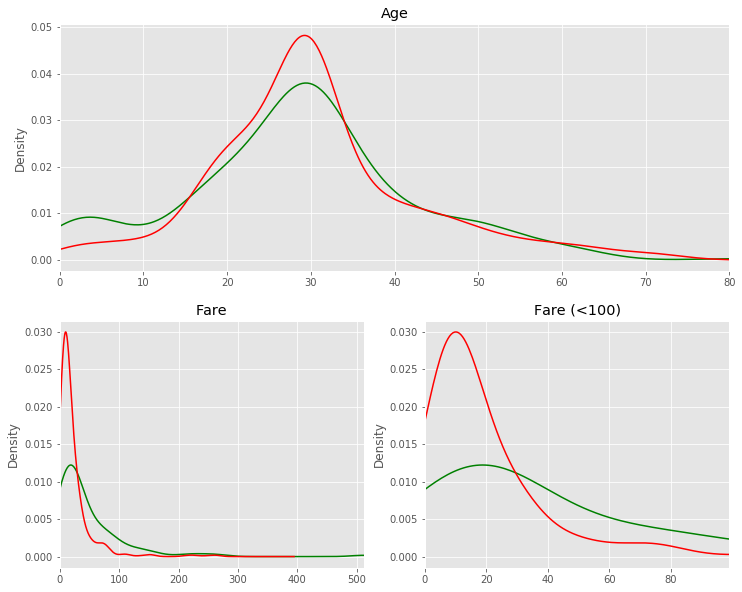

In [80]:

fig = plt.figure(figsize=(12, 10))

plot_kde(fig, 2, 1, 1, 'Age', 'Age', xmax=train.Age.max())
plot_kde(fig, 2, 2, 3, 'Fare', 'Fare', xmax=train.Fare.max())
plot_kde(fig, 2, 2, 4, 'Fare (<100)', 'Fare', xmax=99)


In [81]:
features = ['Age', 'Fare','Sex', 'Pclass']
X_train = train[features].as_matrix()
y_train = train.Survived.as_matrix()


In [82]:
tree_clf = tree.DecisionTreeClassifier()
my_tree = tree_clf.fit(X_train, y_train)
with open('tree.dot', 'w') as w:
    tree.export_graphviz(my_tree, out_file=w, max_depth=4,
                         feature_names=features, filled=True)


In [83]:
my_pca = PCA(n_components=2)
preprocessed_train = preprocessing.normalize(preprocessing.scale(X_train))
print(preprocessed_train.shape)
#missing feature scaling and normalization
my_pca.fit(preprocessed_train)
trans = my_pca.transform(preprocessed_train)

(891, 4)


Text(0.5, 1.0, 'Fare')

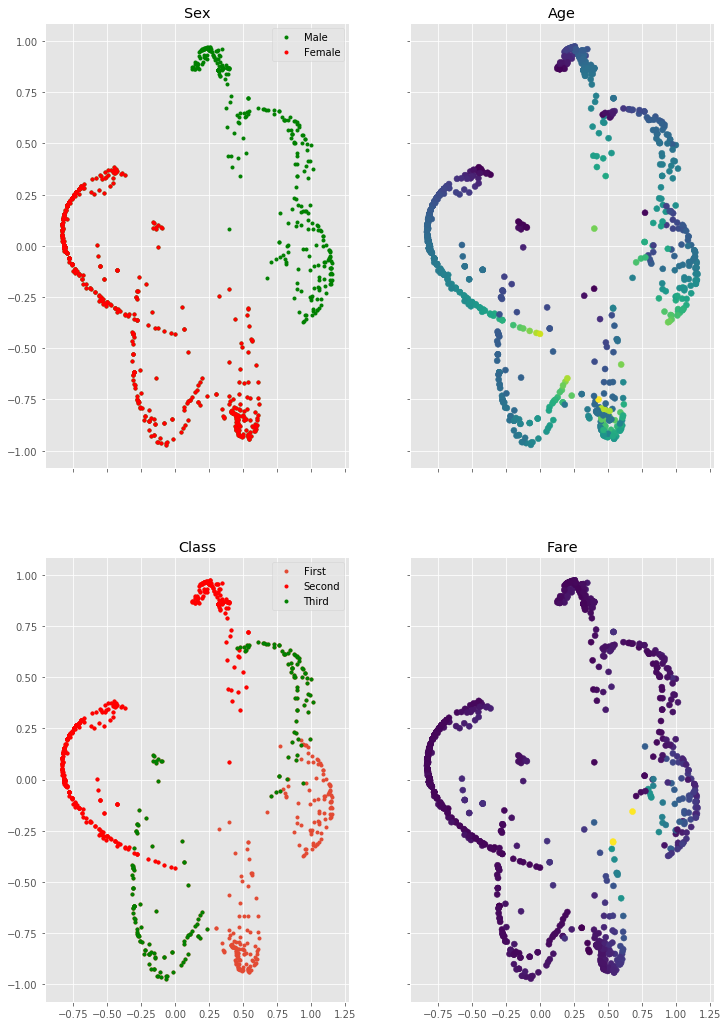

In [84]:
fig, axs = plt.subplots(2, 2, squeeze=False, sharex=True, sharey=True, figsize=(12, 18))

female_trans = np.array([tran for is_female, tran in zip(train['Sex'], trans) if is_female==1])
axs[0, 0].plot(trans[:,0], trans[:,1], '.g', label='Male')
axs[0, 0].plot(female_trans[:,0], female_trans[:,1], 'r.', label='Female')
axs[0, 0].set_title('Sex')
axs[0, 0].legend()

third_trans = np.array([tran for my_class, tran in zip(train['Pclass'], trans) if my_class==3])
second_trans = np.array([tran for my_class, tran in zip(train['Pclass'], trans) if my_class==2])
axs[1, 0].plot(trans[:,0], trans[:,1], '.', label='First')
axs[1, 0].plot(third_trans[:,0], third_trans[:,1], '.r', label='Second')
axs[1, 0].plot(second_trans[:,0], second_trans[:,1], '.g', label='Third')
axs[1, 0].set_title('Class')
axs[1, 0].legend()

axs[0, 1].scatter(trans[:,0], trans[:,1], edgecolors='face', c=train['Age'].as_matrix())
axs[0, 1].set_title('Age')

axs[1, 1].scatter(trans[:,0], trans[:,1], edgecolors='face', c=train['Fare'].as_matrix())
axs[1, 1].set_title('Fare')

# Neural nets

In [85]:
#Split data into training and validation set
X = train.drop('Survived', axis=1)
y = train['Survived']

#Note they are labeled as test sets but I'm treating them as validation data sets.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state= RSEED)


In [86]:
from sklearn.neural_network import MLPClassifier

parameters = {'solver': ['lbfgs'], 'max_iter': [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000 ],
              'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':np.arange(10, 15),
              'random_state':[0,1,2,3,4,5,6,7,8,9]}
clf = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)

clf.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     rando...
             iid='warn', n_jobs=-1,
             param_grid={'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07, 1.e-08,
       1.e-09]),
                         'hidden_layer_sizes': array([10, 11, 12, 13, 14]),
                         'max_iter': [1000, 1100, 1200, 1300, 1400, 1500, 1600,
      

In [87]:
print(clf.best_params_)


{'alpha': 0.1, 'hidden_layer_sizes': 14, 'max_iter': 1400, 'random_state': 9, 'solver': 'lbfgs'}


In [88]:
clf.fit(X_val, y_val)
clf2 = clf.best_estimator_

X_test = test.drop("PassengerId", axis = 1)
predictions = clf2.predict(X_val)
metrics.accuracy_score(y_val,predictions)


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.8059701492537313

# Predict test values

In [89]:
X_train = train.drop('Survived', axis=1)
y_train = train['Survived']


In [90]:
parameters = {'solver': ['lbfgs'], 'max_iter': [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000 ],
              'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':np.arange(10, 15),
              'random_state':[0,1,2,3,4,5,6,7,8,9]}
clf = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)

clf.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     rando...
             iid='warn', n_jobs=-1,
             param_grid={'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07, 1.e-08,
       1.e-09]),
                         'hidden_layer_sizes': array([10, 11, 12, 13, 14]),
                         'max_iter': [1000, 1100, 1200, 1300, 1400, 1500, 1600,
      

In [91]:
print("Best_score: ", grid.best_score_)

Best_score:  0.7486995181005903


In [92]:
print ("Best Parameters: ",str(grid.best_params_))

Best Parameters:  {'leaf_size': 6, 'n_neighbors': 10}


In [93]:
X_test = test.drop("PassengerId", axis = 1)
predictions = clf.predict(X_test)
#metrics.accuracy_score(test,predictions)
#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })

output.to_csv(r'C:\Users\Admin\Desktop\ML3\NeuralNets_Submission.csv', index=False)

# K means